## Fluxes of CO2, O2, and TDS

One of our central goals was to quantify fluxes within the CZ. Here we will calculate these fluxes.

Questions:
- How do fluxes in the epikarst springs compare to fluxes in the sinking stream? Are components gained or lost?
- How do fluxes into the sink point compare to fluxes out at Langle Spring?
- If there are differences in fluxes, what factors might explain these? What processes might be going on within the subsurface or in the sinking stream that change the chemistry of the water?

Fluxes of dissolved constiuents are expressed in terms of mass (or number) per time. Here, we will calculate fluxes as either mg/s, g/s, or mol/s. We calculate flux using

$$ F = C Q, $$

where $F$ is flux, $C$ is the concentration of the constiuent of interest (in mg/L, g/L, or mol/L), and $Q$ is the discharge in $L/s$. 

### CO2 fluxes

Our CO2 measurements are in ppm, and to calculate fluxes we will have to convert to some unit of mass. To calculate concentration of a dissolved gas using a partial pressure, which is what we measured, we use Henry's Law

$$ ({\rm CO_2}) = K_H p{\rm CO_2}, $$

where $({\rm CO_2})$ is the concentration of aqueous ${\rm CO_2}$ in mol/L, $p{\rm CO_2}$ is the partial pressure of ${\rm CO_2}$ in atm, and $K_H$ is Henry's law constant for ${\rm CO_2}$ and is a function of temperature. Luckily, our friend *Olm* makes it easy to calculate $K_H$. If you haven't already installed *Olm*, then run the command below, otherwise, you can skip it.

In [ ]:
!pip install olm-karst

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from olm.calcite import calc_K_H
from olm.general import CtoK

CO2_example = 9000. # An example CO2 value in ppm
T_C = 18. # Example water temperature

#First, we have to convert ppm to atm (atmospheres). 1 atm = 1 million ppm
ppm_per_atm = 10**6
CO2_atm = CO2_example / ppm_per_atm

T_K = CtoK(T_C) #Convert our measured water temp to Kelvin
K_H = calc_K_H(T_K) # Calculate K_H

CO2_mol_L = K_H * CO2_atm
print('(CO2)aq =', CO2_mol_L, 'mol/L')

(CO2)aq = 0.0003742606381252147 mol/L


In [5]:
#If we wanted to convert this to mg/L, we could also use Olm
from olm.general import molL_to_mgL

CO2_mg_L = molL_to_mgL(CO2_mol_L, 'CO2')
print('(CO2)aq =', CO2_mg_L, 'mg/L')


(CO2)aq = 16.4712106838907 mg/L


In [6]:
# Use the approach above, and our data from yesterday, to calculate CO2 fluxes
# at all sites where we have pCO2 and discharge measurements.



In [7]:
# If time allows, you could use a similar approach to calculate fluxes over 
# a long time period using the CO2 and discharge values in Langle.csv



### O2 Fluxes


For dissolved oxygen, the meter already provides with units of mg/L. Therefore, calculation of oxygen fluxes in mg/s is straightforward when combined with discharge. 

In [8]:
# Calculate O2 fluxes for all the sites with O2 and discharge measurements.



### Interpretation of O2 and CO2 fluxes

To provide a bit of additional context on these fluxes, and what might be going on between the sink point and Langle Spring, here are some time series of recent gas concentrations at the site. We have CO2 at Langle and Tree Springs as well as in the shallow (30 cm) and intermediate depth (2.5 m) soil wells. O2 data are limited to only the soil.

In [9]:
from pandas import read_csv

In [40]:
Langle = read_csv('data/Langle-recent.csv', index_col=0, parse_dates=True)
Tree = read_csv('data/Tree-Spring.csv', index_col=0, parse_dates=True)
Soil = read_csv('data/Shallow-Soil.csv', index_col=0, parse_dates=True)
Intermed_well = read_csv('data/Intermediate-Well.csv', index_col=0, parse_dates=True)

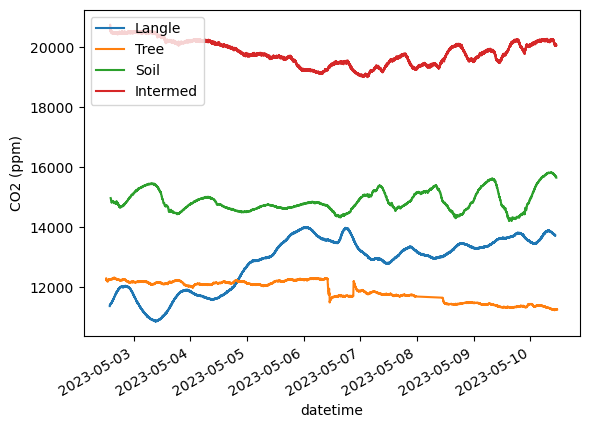

In [46]:
Langle['CO2[ppm]'].plot()
Tree['CO2[ppm]'].plot()
Soil['CO2[ppm]'].plot()
Intermed_well['CO2[ppm]'].plot()
plt.ylabel('CO2 (ppm)')
plt.legend(['Langle', 'Tree', 'Soil','Intermed'], loc='upper left');

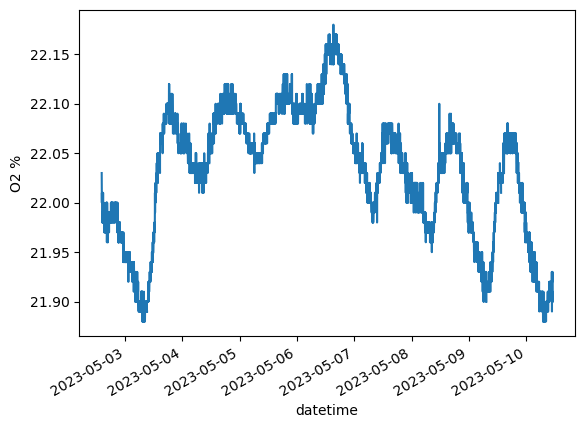

In [45]:
Soil['O2'].plot()
plt.ylabel('O2 %');

### TDS fluxes

To calculate total dissolved solids (TDS), we can use the SpC values and the equation

$$ {\rm TDS} = k \times {\rm SpC}, $$

where $k$ is a constant that is approximately 0.6. This converts SpC in $\mu$S/cm into mg/L TDS.

In [ ]:
# Use the equation above, along with the SpC data to calculate TDS fluxes
# at all sites where we have both discharge and SpC values.

